# Escalamiento de datos numéricos

### Transformaciones lineales

In [3]:
import timeit  #mediremos performance de los modelos, medimos tiempo ejec de modelo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #permite descargar datasets, y regresión lineal sencilla

X, y = datasets.load_diabetes(return_X_y=True)  #Cargamos el dataset
raw = X[:, None, 2] #Agregamos transofrmación en las dimensiones para ajustar al formato de entrada



(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

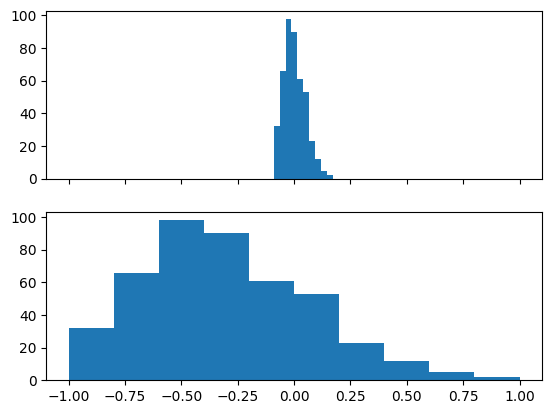

In [ ]:
# Reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - min_raw - max_raw)/(max_raw - min_raw)

# Graficamos la distribución de datos originales vs. los datos escalados

fig, axs = plt.subplots(2, 1, sharex = True) # Creamos figura con arreglo 2x1, compartan escala eje X

axs[0].hist(raw)
axs[1].hist(scaled)


In [ ]:
# Modelos para entrenamiento
# Validamos que el modelo de escalamiento sea el apropiado.

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)


In [ ]:
# Mediremos el tiempo de ejecución en datos originales y escalados
# Para darnos cuenta de reducción del tiempo de ejecuión
# Lo que significa que el escalamiento de datos, sí contribuye a un mejor desempeño del algoritmo

raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print('train_raw : {}'.format(raw_time))
print('train_scaled : {}'.format(scaled_time))

train_raw : 0.04606745595810935
train_scaled : 0.03929548797896132


### Reto con normalización Z

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

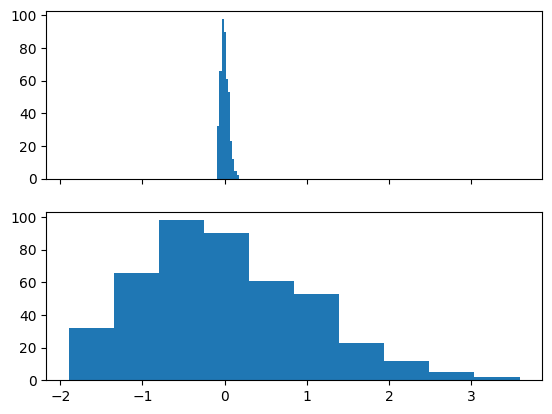

In [5]:
# Obtenemos promedio y desviación estandar de datos

mean_raw = np.mean(raw)
std_raw = np.std(raw)

# Obtenemos escalmiento z_score

z_score = (raw - mean_raw)/std_raw

fig, axs = plt.subplots(2, 1, sharex = True) # Creamos figura con arreglo 2x1, compartan escala eje X

axs[0].hist(raw)
axs[1].hist(z_score)

In [6]:
# Modelos para entrenamiento
# Validamos que el modelo de escalamiento sea el apropiado.

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_z_score():
    linear_model.LinearRegression().fit(z_score, y)

In [7]:
# Mediremos el tiempo de ejecución en datos originales y escalados
# Para darnos cuenta de reducción del tiempo de ejecuión
# Lo que significa que el escalamiento de datos, sí contribuye a un mejor desempeño del algoritmo

raw_time = timeit.timeit(train_raw, number = 100)
z_score_time = timeit.timeit(train_z_score, number = 100)
print('train_raw : {}'.format(raw_time))
print('train_z_score : {}'.format(z_score_time))

train_raw : 0.1282503850015928
train_z_score : 0.0923235560003377


### Transformaciones no lineales

In [9]:
df = pd.read_csv('cars.csv')

<AxesSubplot: >

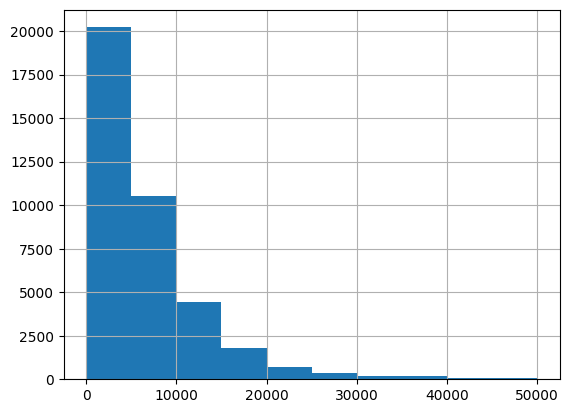

In [10]:
# Graficamos distribución fuertemente sesgada

df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot: >

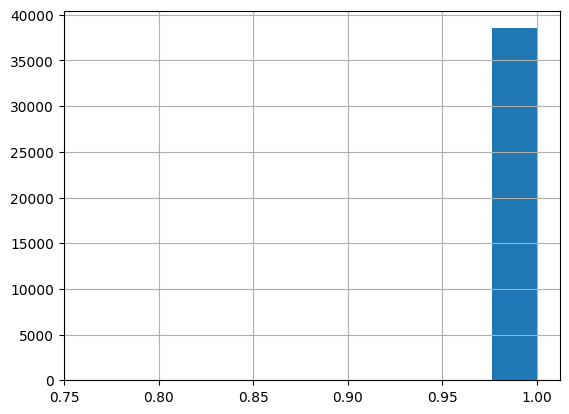

In [12]:
# Graficamos transformación datos con tanh(x)

df.price_usd.apply(lambda x: np.tanh(x)).hist()

<AxesSubplot: >

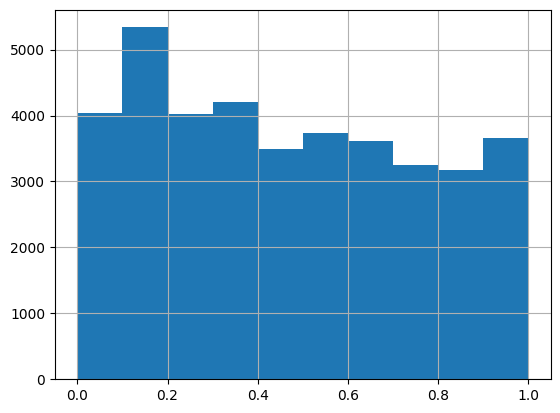

In [14]:
# Graficamos transformación dsatos con tanh(x/p), distribuimos mejor los datos

p = 10000 # Número con el que vamos a calibrar la transformación no lineal

df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41980dd2-2b8f-4b90-8252-74ab9031aebd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>